# Projet V : Optimisez la gestion des données d'une boutique avec Python

##  Réunir les exports de l'erp & de la table cms grace au fichier liaison

Importation des fichiers et librairies

In [1]:
#Importer librairies numpy et pandas 
import numpy as np
import pandas as pd

#Importer les fichiers xlsx 
erp = pd.read_excel ('erp.xlsx')
web = pd.read_excel ('web.xlsx')
liaison = pd.read_excel ('liaison.xlsx')

C:\Users\HAL\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


### Joindre la table cms au fichier liaison 

Verifions dans un premier temps les fichiers 

#### Préparer le fichier web

In [2]:
web.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [3]:
web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    1428 non-null   object        
 1   virtual                1513 non-null   int64         
 2   downloadable           1513 non-null   int64         
 3   rating_count           1513 non-null   int64         
 4   average_rating         1430 non-null   float64       
 5   total_sales            1430 non-null   float64       
 6   tax_status             716 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            1430 non-null   float64       
 9   post_date              1430 non-null   datetime64[ns]
 10  post_date_gmt          1430 non-null   datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             1430 non-null   object        
 13  pos

In [4]:
web.nunique()

sku                       714
virtual                     1
downloadable                1
rating_count                1
average_rating              1
total_sales                41
tax_status                  1
tax_class                   0
post_author                 2
post_date                 716
post_date_gmt             716
post_content                0
post_title                713
post_excerpt              679
post_status                 1
comment_status              1
ping_status                 1
post_password               0
post_name                 716
post_modified             589
post_modified_gmt         589
post_content_filtered       0
post_parent                 1
guid                     1430
menu_order                  1
post_type                   2
post_mime_type              1
comment_count               1
dtype: int64

Après verification, on remarque qu'il y a des doublons à chaque ligne de [sku]. 
Voyons de quoi il s'agit.

In [5]:
#selectionne les lignes qui ont le même sku, ici 15298 (il s'agit du sku de la première ligne, prise au hasard)
web.loc[web['sku']== 15298]

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
799,15298,0,0,0,0.0,6.0,NaN,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


Les lignes doublées ne sont pas parfaitement identiques, sur les colonnes [post_type] et [post_mime_type].

In [6]:
# voir les différentes valeurs pour "post_type"
web["post_type"].unique()

array(['product', nan, 'attachment'], dtype=object)

In [7]:
# voir les différentes valeurs pour "post_mime_type"
web["post_mime_type"].unique()

array([nan, 'image/jpeg'], dtype=object)

On a donc une ligne par 'produit' et une autre pour 'attachment', cette dernière peut contenir une image/jpeg. Cette ligne ne nous interesse pas dans le cadre de ce projet mais comme elle est associée à une valeur pour [total_sales] elle peut fausser nos calculs par la suite.  
Filtron notre df sur les valeurs 'produits' de la colonne [post_type] afin de faire enssuite la jointure qui nous interesse.

In [8]:
web_produit= web.loc[web['post_type'] == "product"]
web_produit.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [9]:
web_produit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 716 entries, 0 to 798
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    714 non-null    object        
 1   virtual                716 non-null    int64         
 2   downloadable           716 non-null    int64         
 3   rating_count           716 non-null    int64         
 4   average_rating         716 non-null    float64       
 5   total_sales            716 non-null    float64       
 6   tax_status             716 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            716 non-null    float64       
 9   post_date              716 non-null    datetime64[ns]
 10  post_date_gmt          716 non-null    datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             716 non-null    object        
 13  post_

Nous avons bien notre df avec nos 714 lignes non doublées de sku (1428/2)
Nous avons 2 lignes qui n'ont pas de 'sku'


In [10]:
web_produit.loc[web_produit["sku"].isna()]

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
470,NaN,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-07-31 12:07:23,...,pierre-jean-villa-cote-rotie-fongeant-2017,2019-11-02 13:24:15,2019-11-02 12:24:15,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
471,NaN,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-08-08 11:23:43,...,pierre-jean-villa-condrieu-suspendu-2018,2019-11-02 13:24:01,2019-11-02 12:24:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


Ces valeurs ne seront pas prises dans nos calculs, elles ne nous sont pas utiles, par soucis de clarté nous pouvons les nettoyer. 

In [11]:
web_produit = web_produit.dropna(subset=['sku'])
web_produit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 798
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    714 non-null    object        
 1   virtual                714 non-null    int64         
 2   downloadable           714 non-null    int64         
 3   rating_count           714 non-null    int64         
 4   average_rating         714 non-null    float64       
 5   total_sales            714 non-null    float64       
 6   tax_status             714 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            714 non-null    float64       
 9   post_date              714 non-null    datetime64[ns]
 10  post_date_gmt          714 non-null    datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             714 non-null    object        
 13  post_

Notre df "web_produit" est à présent préparé.

#### Verifier le fichier liaison

In [12]:
liaison.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  825 non-null    int64 
 1   id_web      734 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


In [13]:
liaison.head()

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


In [14]:
liaison.nunique()

product_id    825
id_web        734
dtype: int64

Grace au travail de Sylvie nous savons que la colonne [id_web] sur liaison correspond aux [sku] de web.  
Nous devons donc utiliser ces colonnes commes clés de jointure.  
    Nous remarquons qu'il n'y a pas de doublons, par contre nous avons des valeurs de [product_id] qui n'ont pas de correspondance [id_web"] ces lignes sont "inutiles" et seront perdues
Nous remarquons aussi qu'il y a plus de valeurs dans [id_web] (734) que dans [sku] (714), ces 20 lignes seront également perdues volontairement lors de la jointure car "inutiles"



#### Première jointure

Nous pouvons à présent joindre nos deux dataframes.  
Procedons à une jointure interne afin de ne concerver que les lignes en commun [sku/id_web] utilisables. 

In [15]:
#jointure interne (how= inner, par defaut) entre les df liaison et web_produit, via les colonnées id_web et sku comme clés
jointure1= pd.merge (liaison, web_produit, left_on = 'id_web', right_on = 'sku')
jointure1.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 713
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   product_id             714 non-null    int64         
 1   id_web                 714 non-null    object        
 2   sku                    714 non-null    object        
 3   virtual                714 non-null    int64         
 4   downloadable           714 non-null    int64         
 5   rating_count           714 non-null    int64         
 6   average_rating         714 non-null    float64       
 7   total_sales            714 non-null    float64       
 8   tax_status             714 non-null    object        
 9   tax_class              0 non-null      float64       
 10  post_author            714 non-null    float64       
 11  post_date              714 non-null    datetime64[ns]
 12  post_date_gmt          714 non-null    datetime64[ns]
 13  post_

Nous avons réussi notre première jointure qui comporte bien 714 valeurs non null de sku/id_web.

### Joindre à l'export ERP

#### Vérifions le fichier erp 

Recommençons les mêmes verifications pour erp

In [16]:
erp.head()

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock


In [17]:
erp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 32.4+ KB


In [18]:
erp.nunique()

product_id        825
onsale_web          2
price             381
stock_quantity    128
stock_status        2
dtype: int64

Nous avons la colonne [product_id] en commun qui servira de clé de jointure.  
erp contient 825 valeurs uniques de [product_id] contre 714 pour jointure1. 

#### Deuxième jointure

Effectuons une jointure simple sur la colonne [product_id] commune aux 2 DF. 

In [19]:
#jointure simple, par defaut interne, ne concerve que les valeurs communes. 
jointure2= pd.merge(jointure1, erp, on = 'product_id')
jointure2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 713
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   product_id             714 non-null    int64         
 1   id_web                 714 non-null    object        
 2   sku                    714 non-null    object        
 3   virtual                714 non-null    int64         
 4   downloadable           714 non-null    int64         
 5   rating_count           714 non-null    int64         
 6   average_rating         714 non-null    float64       
 7   total_sales            714 non-null    float64       
 8   tax_status             714 non-null    object        
 9   tax_class              0 non-null      float64       
 10  post_author            714 non-null    float64       
 11  post_date              714 non-null    datetime64[ns]
 12  post_date_gmt          714 non-null    datetime64[ns]
 13  post_

Nous avons bien joint les données communes aux fichiers web et erp grace au fichier liaison dans un nouveau dataframe, qui va nous être utile pour notre analyse.  


### Création et export du fichier joint

In [20]:
Union = 'Union.xlsx'
jointure2.to_excel(Union)
Union = pd.read_excel ('Union.xlsx')
Union.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             714 non-null    int64         
 1   product_id             714 non-null    int64         
 2   id_web                 714 non-null    object        
 3   sku                    714 non-null    object        
 4   virtual                714 non-null    int64         
 5   downloadable           714 non-null    int64         
 6   rating_count           714 non-null    int64         
 7   average_rating         714 non-null    int64         
 8   total_sales            714 non-null    int64         
 9   tax_status             714 non-null    object        
 10  tax_class              0 non-null      float64       
 11  post_author            714 non-null    int64         
 12  post_date              714 non-null    datetime64[ns]
 13  post_

Nous avons un fichier xlsx exportable appellé "Union" qui réunit nos données exploitables pour d'évantuelles futures analyses, sans avoir à recommencer cette procedure verification+jointure...

## Calculs sur le Chiffre d'Affaires 

### Calcul du CA par produit 

Nous allons créer une colonne dans le dataframe qui contient le ca/produit en multipliant le nombre de ventes/produit par le prix du produit.  
Nous appelons "df" ce nouveau dataframe.



In [21]:
df= jointure2.assign(ca_produit=jointure2["price"]*jointure2["total_sales"] ) 
df.head()

,product_id,id_web,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,...,guid,menu_order,post_type,post_mime_type,comment_count,onsale_web,price,stock_quantity,stock_status,ca_produit
0,3847,15298,15298,0,0,0,0.0,6.0,taxable,NaN,...,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,1,24.2,0,outofstock,145.2
1,3849,15296,15296,0,0,0,0.0,0.0,taxable,NaN,...,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,1,34.3,0,outofstock,0.0
2,3850,15300,15300,0,0,0,0.0,0.0,taxable,NaN,...,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,1,20.8,0,outofstock,0.0
3,4032,19814,19814,0,0,0,0.0,3.0,taxable,NaN,...,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,1,14.1,0,outofstock,42.3
4,4039,19815,19815,0,0,0,0.0,0.0,taxable,NaN,...,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,1,46.0,0,outofstock,0.0


Nous avons bien notre colonne "ca_produit" qui contient le ca pour chaque produit

In [22]:
#Afficher le nom et le ca des 10 premiers produits pour avoir un aperçu
df[["post_name","ca_produit"]].head(10)

,post_name,ca_produit
0,pierre-jean-villa-saint-joseph-preface-2018,145.2
1,pierre-jean-villa-saint-joseph-tilde-2017,0.0
2,pierre-jean-villa-croze-hermitage-accroche-coe...,0.0
3,pierre-jean-villa-igp-gamine-2018,42.3
4,pierre-jean-villa-cote-rotie-carmina-2017,0.0
5,pierre-jean-villa-saint-joseph-saut-ange-2018,0.0
6,pierre-gaillard-condrieu-2018,0.0
7,pierre-gaillard-cornas-2017,218.4
8,pierre-gaillard-cote-rotie-esprit-blond-2017,180.0
9,pierre-gaillard-cote-rotie-2018,596.4


### Calcul du CA total 

Nous n'avons plus qu'à faire la somme du chiffre d'affaires par produit pour avoir le chiffre d'affaire total 


In [23]:
CA_total = df["ca_produit"].sum()
print("le chiffre d'affaire total des ventes en lignes est de",CA_total)

le chiffre d'affaire total des ventes en lignes est de 70568.6


## Analyse des Prix

### Detecter les outliers

Utilisons la fonction describe pour avoir des statistiques sur les données

In [24]:
df.describe()

,product_id,virtual,downloadable,rating_count,average_rating,total_sales,tax_class,post_author,post_content,post_password,post_content_filtered,post_parent,menu_order,comment_count,onsale_web,price,stock_quantity,ca_produit
count,714.000000,714.0,714.0,714.0,714.0,714.000000,0.0,714.000000,0.0,0.0,0.0,714.0,714.0,714.0,714.0,714.000000,714.000000,714.000000
mean,5032.557423,0.0,0.0,0.0,0.0,4.012605,NaN,1.998599,NaN,NaN,NaN,0.0,0.0,0.0,1.0,32.493137,28.746499,98.835574
std,790.510878,0.0,0.0,0.0,0.0,8.518183,NaN,0.037424,NaN,NaN,NaN,0.0,0.0,0.0,0.0,27.810525,48.012608,307.685071
min,3847.000000,0.0,0.0,0.0,0.0,0.000000,NaN,1.000000,NaN,NaN,NaN,0.0,0.0,0.0,1.0,5.200000,0.000000,0.000000
25%,4280.250000,0.0,0.0,0.0,0.0,0.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0,1.0,14.100000,2.000000,0.000000
50%,4796.000000,0.0,0.0,0.0,0.0,1.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0,1.0,23.550000,12.000000,15.250000
75%,5710.500000,0.0,0.0,0.0,0.0,4.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0,1.0,42.175000,35.000000,91.150000
max,7338.000000,0.0,0.0,0.0,0.0,96.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0,1.0,225.000000,578.000000,4704.000000


Nous avons donc un prix moyen par produit de 32,5  
Le nombre moyen de ventes par produit est de 4  
Le Produit le moins cher coute 5.2  
Le Produit le plus cher coute 225  
Le Prix Median d'une bouteille est de 23.5  
Nous avons donc un CA moyen par produit de 98.8

Visualison la dispersion des prix grace a une boite à moustache 

In [25]:
import matplotlib.pyplot as plt
import seaborn as sb 

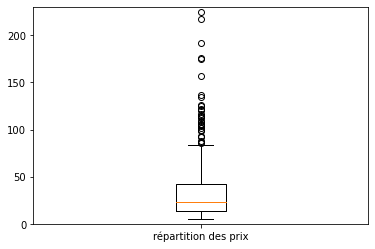

In [26]:
data = df["price"]
plt.boxplot(data)
plt.ylim(0,230)
plt.savefig('SimpleBoxPlot02.png')
plt.gca().xaxis.set_ticklabels(['répartition des prix']) ;plt.show()

On peut observer des valeurs aberrantes ou outliers sur le graphique.

Une valeur aberrante est une valeur qui s'écarte fortement des valeurs des autres observations, anormalement faible ou élevée. Il ne s'agit pas forcement d'erreurs. Sur une boite à moustache elles sont mises en évidence par les points au délà des "moustaches". Ici nous n'avons que des valeurs abérrantes supérieures.


Les extrémités des moustaches sont calculées en utilisant 1.5 fois l'espace interquartile.  
Mettons les en évidence ! 

In [27]:
q3= df.price.quantile([0.75]).values[0]
q1= df.price.quantile([0.25]).values[0]
iqr=q3-q1
extrem= q3+1.5*iqr

In [28]:
prix_out= df.loc[df.price > extrem,:]
prix_out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 63 to 657
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   product_id             32 non-null     int64         
 1   id_web                 32 non-null     object        
 2   sku                    32 non-null     object        
 3   virtual                32 non-null     int64         
 4   downloadable           32 non-null     int64         
 5   rating_count           32 non-null     int64         
 6   average_rating         32 non-null     float64       
 7   total_sales            32 non-null     float64       
 8   tax_status             32 non-null     object        
 9   tax_class              0 non-null      float64       
 10  post_author            32 non-null     float64       
 11  post_date              32 non-null     datetime64[ns]
 12  post_date_gmt          32 non-null     datetime64[ns]
 13  post_

In [29]:
prix_out.sort_values("price")

,product_id,id_web,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,...,guid,menu_order,post_type,post_mime_type,comment_count,onsale_web,price,stock_quantity,stock_status,ca_produit
205,4359,13853,13853,0,0,0,0.0,1.0,taxable,NaN,...,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,1,85.6,0,outofstock,85.6
438,5026,13913,13913,0,0,0,0.0,0.0,taxable,NaN,...,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,1,86.8,2,instock,0.0
65,4132,11668,11668,0,0,0,0.0,0.0,taxable,NaN,...,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,1,88.4,5,instock,0.0
502,5565,19822,19822,0,0,0,0.0,0.0,taxable,NaN,...,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,1,92.0,0,outofstock,0.0
602,5916,14774,14774,0,0,0,0.0,0.0,taxable,NaN,...,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,1,93.0,3,instock,0.0
655,6214,11601,11601,0,0,0,0.0,0.0,taxable,NaN,...,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,1,99.0,7,instock,0.0
63,4115,15382,15382,0,0,0,0.0,0.0,taxable,NaN,...,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,1,100.0,11,instock,0.0
380,4903,14805,14805,0,0,0,0.0,0.0,taxable,NaN,...,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,1,102.3,20,instock,0.0
222,4407,3509,3509,0,0,0,0.0,1.0,taxable,NaN,...,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,1,104.0,6,instock,104.0
432,5008,11602,11602,0,0,0,0.0,0.0,taxable,NaN,...,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,1,105.0,10,instock,0.0


Nous avons donc 32 produits dont la valeurs des prix est "abérrante". 

In [30]:
prix_out.describe()

,product_id,virtual,downloadable,rating_count,average_rating,total_sales,tax_class,post_author,post_content,post_password,post_content_filtered,post_parent,menu_order,comment_count,onsale_web,price,stock_quantity,ca_produit
count,32.000000,32.0,32.0,32.0,32.0,32.000000,0.0,32.0,0.0,0.0,0.0,32.0,32.0,32.0,32.0,32.000000,32.000000,32.000000
mean,5267.937500,0.0,0.0,0.0,0.0,1.406250,NaN,2.0,NaN,NaN,NaN,0.0,0.0,0.0,1.0,124.571875,7.250000,217.812500
std,766.699964,0.0,0.0,0.0,0.0,3.109397,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,36.068727,5.588006,505.080853
min,4115.000000,0.0,0.0,0.0,0.0,0.000000,NaN,2.0,NaN,NaN,NaN,0.0,0.0,0.0,1.0,85.600000,0.000000,0.000000
25%,4406.750000,0.0,0.0,0.0,0.0,0.000000,NaN,2.0,NaN,NaN,NaN,0.0,0.0,0.0,1.0,103.575000,2.750000,0.000000
50%,5025.500000,0.0,0.0,0.0,0.0,0.000000,NaN,2.0,NaN,NaN,NaN,0.0,0.0,0.0,1.0,114.500000,7.000000,0.000000
75%,5970.000000,0.0,0.0,0.0,0.0,1.250000,NaN,2.0,NaN,NaN,NaN,0.0,0.0,0.0,1.0,128.625000,10.250000,132.250000
max,6216.000000,0.0,0.0,0.0,0.0,13.000000,NaN,2.0,NaN,NaN,NaN,0.0,0.0,0.0,1.0,225.000000,20.000000,2288.000000


Ces produits qui coutent plus de 85.6 contre 32.5 pour la moyenne totale se vendent en moyenne 1.4 fois contre 4 pour la moyenne totale mais ils rapportent plus de 2 fois plus que la moyenne des produits. Ils sont donc beaucoup plus rentables en moyenne. 

### Quelques verifications par comparaison 

In [31]:
prix_out[["sku","post_name", "price", "total_sales", "stock_quantity","ca_produit"]].sort_values (by="price")

,sku,post_name,price,total_sales,stock_quantity,ca_produit
205,13853,champagne-larmandier-bernier-grand-cru-vieille...,85.6,1.0,0,85.6
438,13913,champagne-agrapart-fils-mineral-extra-brut-bla...,86.8,0.0,2,0.0
65,11668,zind-humbrecht-pinot-gris-grand-cru-rangen-de-...,88.4,0.0,5,0.0
502,19822,tempier-bandol-cabassaou-2017,92.0,0.0,0,0.0
602,14774,wemyss-malts-single-cask-chocolate-moka-cake,93.0,0.0,3,0.0
655,11601,domaine-des-comtes-lafon-volnay-1er-cru-champa...,99.0,0.0,7,0.0
63,15382,zind-humbrecht-riesling-gc-rangen-thann-clos-s...,100.0,0.0,11,0.0
380,14805,domaine-des-croix-corton-grand-cru-les-greves-...,102.3,0.0,20,0.0
222,3509,cognac-frapin-cigar-blend,104.0,1.0,6,104.0
432,11602,domaine-des-comtes-lafon-volnay-1er-cru-santen...,105.0,0.0,10,0.0


Concentrons nous sur les produits qui se vendent le plus et le moins.

produit vendu + = Cognac Frapin VIP XO, trouvé ici à 179 : https://www.cognac-expert.com/fr/cognac-xo/frapin-xo-cognac-vip
Le prix semble conforme à ce qu'on peut trouver ailleurs

produit vendu le - : david-duband-charmes-chambertin-grand-cru-2014, non vendu, 20 bouteilles en stock, trouvé à plus de 1000e contre 217 sur le site https://www.millesima.fr/david-duband-charmes-chambertin-grand-cru-2014.html

Il semblerait donc qu'il y ai au moins 1erreur de saisie de prix ou bien une trés grosse promo ...  
Nous pouvons voir que les bouteilles de vin peuvent couter beaucoup plus que notre produit le plus cher.  
Notre répartition des prix nous indique que nous vendons plutot des produits accessibles avec quelques références plus couteuses, qui semblent "aberrantes" au regard des prix moyens notre catalogue mais qui ne le sont pas forcement sur le marché global du vin. 


### Analyse graphique sur les prix 

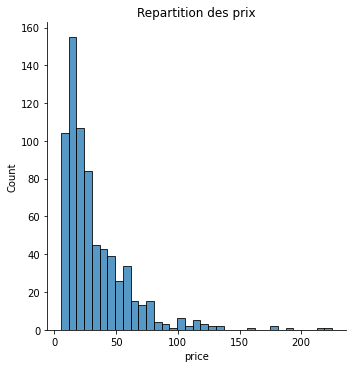

In [32]:
sb.displot(df["price"]).set(title='Repartition des prix')

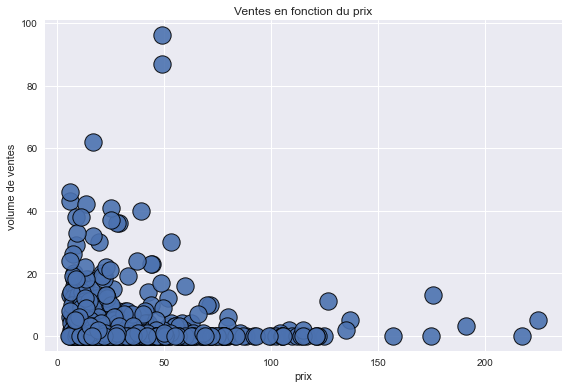

In [33]:
plt.style.use('seaborn')
prix = df['price']
nb_ventes = df['total_sales']
plt.scatter(prix, nb_ventes, s=300, alpha=0.9, edgecolor='black', linewidth=1)
plt.title('Ventes en fonction du prix')
plt.xlabel('prix')
plt.ylabel('volume de ventes')
plt.tight_layout()
plt.show() 

Nous pouvons voir une tendence à la baise des ventes à mesure que les prix augmentent

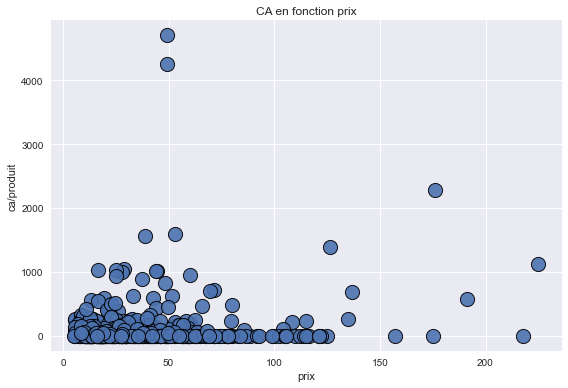

In [34]:
plt.style.use('seaborn')
prix = df['price']
ca_produit = df['ca_produit']
plt.scatter(prix, ca_produit,   s=200, alpha=0.9, edgecolor='black', linewidth=1)
plt.title('CA en fonction prix')
plt.xlabel ('prix')
plt.ylabel ('ca/produit')  
plt.tight_layout()
plt.show() 

ici la tendence n'est plus du tout évidente, les produits les plus couteux ne rapportent pas moins, au contraire.

## Analyse complémentaire

Par mesure de clarté concervons les colonnes qui nous interessent

In [35]:
df2 = df [["post_name","sku","price","total_sales","stock_quantity","stock_status","ca_produit" ]]
df2.head()

,post_name,sku,price,total_sales,stock_quantity,stock_status,ca_produit
0,pierre-jean-villa-saint-joseph-preface-2018,15298,24.2,6.0,0,outofstock,145.2
1,pierre-jean-villa-saint-joseph-tilde-2017,15296,34.3,0.0,0,outofstock,0.0
2,pierre-jean-villa-croze-hermitage-accroche-coe...,15300,20.8,0.0,0,outofstock,0.0
3,pierre-jean-villa-igp-gamine-2018,19814,14.1,3.0,0,outofstock,42.3
4,pierre-jean-villa-cote-rotie-carmina-2017,19815,46.0,0.0,0,outofstock,0.0


Prenons arbitrairement les valeurs au delà du 95e percentile comme notre "top" pour nos analyses.
Elles correspondent environ aux outliers d'une boite à moustache

### Analyse des ventes

#### top ventes

In [36]:
top1 = np.percentile(df2.total_sales, 95)
top_ventes = df2.loc[df2['total_sales']> top1]
top_ventes.info()
#nous mettons en évidence ici les produits qui se vendent le plus
#ils correspondent aux produits qui se vendent plus de fois que notre top statistique (au delà du 95e centile)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33 entries, 17 to 652
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   post_name       33 non-null     object 
 1   sku             33 non-null     object 
 2   price           33 non-null     float64
 3   total_sales     33 non-null     float64
 4   stock_quantity  33 non-null     int64  
 5   stock_status    33 non-null     object 
 6   ca_produit      33 non-null     float64
dtypes: float64(3), int64(1), object(3)
memory usage: 2.1+ KB


In [37]:
#classons notre top par ordre decroissant 
top_ventes.sort_values(by = 'total_sales', ascending = False)

,post_name,sku,price,total_sales,stock_quantity,stock_status,ca_produit
194,champagne-gosset-grand-blanc-de-blanc,7818,49.0,96.0,0,outofstock,4704.0
71,champagne-gosset-grand-rose,1662,49.0,87.0,11,instock,4263.0
30,gilles-robin-crozes-hermitage-papillon-2019,16416,16.6,62.0,157,instock,1029.2
119,moulin-de-gassac-igp-pays-dherault-guilhem-ros...,16295,5.8,46.0,190,instock,266.8
97,maurel-pays-oc-chardonnay-2019,16210,5.7,43.0,167,instock,245.1
109,le-pas-de-lescalette-languedoc-petits-pas-2019,16189,13.3,42.0,90,instock,558.6
651,domaine-giudicelli-patrimonio-blanc-2019,16580,25.2,41.0,120,instock,1033.2
69,gosset-champagne-grande-reserve,304,39.0,40.0,1,instock,1560.0
625,chateau-de-la-liquiere-faugeres-ampoule-2019,16264,10.9,38.0,46,instock,414.2
324,emile-boeckel-cremant-brut-blanc-de-blancs,38,8.6,38.0,151,instock,326.8


On remarque tout de suite que le produit le plus vendu est outstock :-(

#### stocks/top ventes

Calculons le nombre de produits hors stock de notre top.  
Nous considerons la valeurs "1" comme critique et l'integrons à nos données "hors stock"

In [38]:
top_ventes_outstock = top_ventes.loc[top_ventes ['stock_quantity']<= 1  ]
top_ventes_outstock.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 69 to 546
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   post_name       8 non-null      object 
 1   sku             8 non-null      object 
 2   price           8 non-null      float64
 3   total_sales     8 non-null      float64
 4   stock_quantity  8 non-null      int64  
 5   stock_status    8 non-null      object 
 6   ca_produit      8 non-null      float64
dtypes: float64(3), int64(1), object(3)
memory usage: 512.0+ bytes


In [39]:
top_ventes_outstock.head(8)

,post_name,sku,price,total_sales,stock_quantity,stock_status,ca_produit
69,gosset-champagne-grande-reserve,304,39.0,40.0,1,instock,1560.0
79,elian-daros-cotes-du-marmandais-clos-baquey-2015,16237,29.0,36.0,0,outofstock,1044.0
194,champagne-gosset-grand-blanc-de-blanc,7818,49.0,96.0,0,outofstock,4704.0
228,marc-colin-et-fils-chassagne-montrachet-blanc-...,15476,43.9,23.0,0,outofstock,1009.7
366,triennes-igp-mediterranee-rose-2019,16149,9.3,33.0,0,outofstock,306.9
373,jacqueson-rully-blanc-1er-cru-la-pucelle-2018,15807,27.9,36.0,0,outofstock,1004.4
390,alain-graillot-crozes-hermitage-rouge-la-guira...,15533,37.2,24.0,0,outofstock,892.8
546,boudignon-anjou-blanc-2018,15631,24.5,21.0,1,instock,514.5


In [40]:
#ratio produits hors stock sur produit total pour top vente, mis en pourcentage et arrondit) 
round(len(top_ventes_outstock)/len(top_ventes)*100,1)

24.2

+24% des references les plus vendues sont outstock

#### top ventes/ventes totales

In [41]:
#nombre de ventes totales pour les produits qui se vendent le plus "top_ventes"
top_ventes_total = top_ventes["total_sales"].sum()
print (top_ventes_total)

1116.0


In [42]:
#calcul des ventes totales tous produits confondus
total_ventes = df2["total_sales"].sum()
print(total_ventes)

2865.0


In [43]:
#calcul de ratio des meilleures ventes sur les ventes totales, mis en pourcentage et arrondit
round (top_ventes_total/total_ventes*100,1)

39.0

Sur 714 references les 33 qui se vendent le plus representent pres de 40% des ventes !!!

#### Invendus

Mettons en évidence les produits qui ne se sont jamais vendus

In [44]:
invendus = df2.loc[df['total_sales']== 0]
invendus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 329 entries, 1 to 713
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   post_name       329 non-null    object 
 1   sku             329 non-null    object 
 2   price           329 non-null    float64
 3   total_sales     329 non-null    float64
 4   stock_quantity  329 non-null    int64  
 5   stock_status    329 non-null    object 
 6   ca_produit      329 non-null    float64
dtypes: float64(3), int64(1), object(3)
memory usage: 20.6+ KB


In [45]:
#Calculer le ratio d'invendus (nb de lignes invendus sur notre df) sur nb totalde produits en ventes.
#Le résultat est arrondit à 1 chiffre après la virgule et mis en pourcentage

round (len(invendus['total_sales'])/len(df['total_sales'])*100,1)

46.1

sur nos 714 produits, nous en avons 329 d'invendus soit 46% de nos produits. 

#### Top Ventes Bilan

In [46]:
top_ventes.describe()

,price,total_sales,stock_quantity,ca_produit
count,33.000000,33.000000,33.000000,33.000000
mean,22.551515,33.818182,67.939394,841.084848
std,14.201961,18.028544,90.927492,1017.678977
min,5.700000,19.000000,0.000000,134.900000
25%,9.300000,22.000000,4.000000,306.900000
50%,21.000000,30.000000,23.000000,514.500000
75%,29.000000,38.000000,118.000000,1009.700000
max,53.000000,96.000000,363.000000,4704.000000


Les bouteilles qui se vendent le plus coutent entre 5.7 et 53, moyenne de 22.55, elles rapportent 841.  
46% des produits sont  invendus
Ce sont pas forcement les bouteilles qui rapportent le plus mais celles qui font venir le plus d'acheteur sur le site.  c'est donc interessant à savoir dans le cadre d'une campagne marketing, donc il faudrait les avoir en stock !
24% sont outstock ! 

### Analyse sur le CA

#### Top CA

Utilisons la même methode que pour les ventes pour faire notre top sur le chiffre d'affaires

In [47]:
top2 = np.percentile(df2.ca_produit, 95)
top_ca = df2.loc[df2['ca_produit']> top2]
top_ca.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 9 to 652
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   post_name       36 non-null     object 
 1   sku             36 non-null     object 
 2   price           36 non-null     float64
 3   total_sales     36 non-null     float64
 4   stock_quantity  36 non-null     int64  
 5   stock_status    36 non-null     object 
 6   ca_produit      36 non-null     float64
dtypes: float64(3), int64(1), object(3)
memory usage: 2.2+ KB


In [48]:
#classer notre top par ordre decroissant
top_ca.sort_values(by = 'ca_produit', ascending = False)

,post_name,sku,price,total_sales,stock_quantity,stock_status,ca_produit
194,champagne-gosset-grand-blanc-de-blanc,7818,49.0,96.0,0,outofstock,4704.0
71,champagne-gosset-grand-rose,1662,49.0,87.0,11,instock,4263.0
218,cognac-frapin-vip-xo,3510,176.0,13.0,8,instock,2288.0
70,champagne-gosset-grand-millesime-2006,11641,53.0,30.0,8,instock,1590.0
69,gosset-champagne-grande-reserve,304,39.0,40.0,1,instock,1560.0
201,champagne-egly-ouriet-grand-cru-brut-blanc-de-...,12589,126.5,11.0,2,instock,1391.5
199,champagne-egly-ouriet-grand-cru-millesime-2008,15940,225.0,5.0,0,outofstock,1125.0
79,elian-daros-cotes-du-marmandais-clos-baquey-2015,16237,29.0,36.0,0,outofstock,1044.0
651,domaine-giudicelli-patrimonio-blanc-2019,16580,25.2,41.0,120,instock,1033.2
30,gilles-robin-crozes-hermitage-papillon-2019,16416,16.6,62.0,157,instock,1029.2


#### Part des produits qui rapportent le plus sur le CA

In [49]:
#calcul du CA du top
ca_top = top_ca["ca_produit"].sum()
print(ca_top)

36960.6


In [50]:
round(ca_top/CA_total*100,1)

52.4

la moitié du CA total est réalisé grace au top ca de 36 produits ! 

#### Stock/top_ca

In [51]:
top_ca_outstock = top_ca.loc[top_ca ['stock_quantity']<= 1  ]

In [52]:
top_ca_outstock.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13 entries, 10 to 605
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   post_name       13 non-null     object 
 1   sku             13 non-null     object 
 2   price           13 non-null     float64
 3   total_sales     13 non-null     float64
 4   stock_quantity  13 non-null     int64  
 5   stock_status    13 non-null     object 
 6   ca_produit      13 non-null     float64
dtypes: float64(3), int64(1), object(3)
memory usage: 832.0+ bytes


sur les 36 produits qui rapportent le plus 13 sont "outofstock" 

In [53]:
round(len(top_ca_outstock)/len(top_ca)*100,1)

36.1

celà represente 35% de l'échantillon ce qui n'est pas negligeable

#### Comparaison top_ventes et top_ca

In [54]:
Top_du_top= pd.merge(top_ca, top_ventes, on = ['sku'],indicator=True, how="left")
Top_du_top._merge.value_counts()


both          21
left_only     15
right_only     0
Name: _merge, dtype: int64

Nous avons donc 21 références communes entre les produits les plus vendus et ceux qui rapportent le plus. celà fait presque 2/3 de references en commun. Le top du top peut representer les produits "stars" de la boutique. 

#### CA Bilan

In [55]:
top_ca.describe()

,price,total_sales,stock_quantity,ca_produit
count,36.000000,36.000000,36.000000,36.000000
mean,57.286111,25.722222,30.361111,1026.683333
std,51.280679,21.020549,67.491863,941.884126
min,10.900000,3.000000,0.000000,414.200000
25%,25.025000,10.750000,0.000000,531.825000
50%,43.950000,20.500000,6.500000,707.000000
75%,61.400000,36.000000,17.750000,1030.200000
max,225.000000,96.000000,363.000000,4704.000000


Les bouteilles qui rapportent le plus coutent entre 10.9 et 225, moyenne de 57, elles rapportent 36960 au total soit 1026 en moyenne.35% sont outstock alors qu'ils representent 52% du CA total

### Analyse Instock/Outstock

#### Ventes/stocks

In [56]:
#Calcul quantité de produits en stock
df2['stock_quantity'].sum()

20525

In [57]:
#Calcul du ratio de ventes sur les stock total (stock total = produits actuellement en stocks + ceux vendus)
#arrondir 1er chiffre après la virgule
round (total_ventes/(df2['stock_quantity'].sum()+total_ventes)*100,1)

12.2

on a donc vendu 12.2% des produits traités

#### % references instocks/outstock

In [58]:
#calcul nb de produits en stock
len(df.loc[df['stock_status']== 'instock'])

574

In [59]:
#calcul nb de produits outstock
len(df.loc[df['stock_status']== 'outofstock'])

140

In [60]:
#calcul du ration en stock sur produits totaux, mis en pourcentage et arrondit
round (len(df.loc[df['stock_status']== 'instock'])/ len(df['stock_status'])*100,1)

80.4

on a 574 produits en stocks et 140 hors stocks, sur 714 ce qui represente 80.4%

### top flop = produis en stocks invendus 

In [61]:
#Calcul des produits invendus qui sont disponibles en stock 
top_flop= invendus.loc[invendus['stock_status']== "instock"]
top_flop.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 256 entries, 6 to 713
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   post_name       256 non-null    object 
 1   sku             256 non-null    object 
 2   price           256 non-null    float64
 3   total_sales     256 non-null    float64
 4   stock_quantity  256 non-null    int64  
 5   stock_status    256 non-null    object 
 6   ca_produit      256 non-null    float64
dtypes: float64(3), int64(1), object(3)
memory usage: 16.0+ KB


On a donc 256 produits en stock qui n'ont jamais été vendus.  
Ci dessous le top 10 des produits jamais écoulés dont on a le plus de stock

In [62]:
#classement du top flop par ordre decroissanr
top_flop.sort_values(by ='stock_quantity', ascending = False)

,post_name,sku,price,total_sales,stock_quantity,stock_status,ca_produit
239,francois-bergeret-hautes-cotes-de-beaune-rouge...,15145,11.8,0.0,237,instock,0.0
332,domaine-de-montgilet-anjou-blanc-2016,15315,11.9,0.0,140,instock,0.0
191,idylle-savoie-cruet-2018,15120,8.1,0.0,133,instock,0.0
560,maurel-pays-d-oc-cabernet-sauvignon-2017,14338,5.7,0.0,132,instock,0.0
566,chateau-saransot-dupre-listrac-medoc-2016,15688,17.2,0.0,123,instock,0.0
...,...,...,...,...,...,...,...
594,stephane-tissot-arbois-trousseau-singulier-2017,14099,27.3,0.0,1,instock,0.0
689,weingut-besson-strasser-zurich-rauschling-2018,15790,33.2,0.0,1,instock,0.0
176,i-fabbri-chianti-classico-terra-di-lamole-2015,14527,17.6,0.0,1,instock,0.0
170,serol-cote-roannaise-originelles-2019,16244,10.2,0.0,1,instock,0.0


### Valeur des stocks

Calculons la valeur de nos stocks d'invendus  
Création d'une colonne [ca_stock] qui calcule le CA hypothethique de nos invendus en stock, en multipliant la quantité de produits en stock par leurs "prix"



In [63]:
#creation de la colonne dans un df appelé 'df_pertes' et classement par ordre decroissant sur le ca_stock
df_pertes= top_flop.assign(ca_stock=top_flop["stock_quantity"]*top_flop["price"] )
df_pertes.sort_values(by ='ca_stock', ascending = False)

,post_name,sku,price,total_sales,stock_quantity,stock_status,ca_produit,ca_stock
426,david-duband-charmes-chambertin-grand-cru-2014,14581,217.5,0.0,20,instock,0.0,4350.0
239,francois-bergeret-hautes-cotes-de-beaune-rouge...,15145,11.8,0.0,237,instock,0.0,2796.6
120,mas-de-daumas-gassac-igp-saint-guilhem-le-dese...,15656,38.0,0.0,69,instock,0.0,2622.0
424,domaine-peyre-rose-marlene-n3-2008,14508,78.0,0.0,33,instock,0.0,2574.0
75,champagne-mailly-grand-cru-intemporelle-rose-2009,7086,69.0,0.0,34,instock,0.0,2346.0
...,...,...,...,...,...,...,...,...
685,clos-du-mont-olivet-vins-de-pays-du-gard-confl...,15539,13.5,0.0,2,instock,0.0,27.0
632,chateau-de-villeneuve-saumur-champigny-bienboi...,15486,13.4,0.0,2,instock,0.0,26.8
320,francois-baur-riesling-grand-cru-brand-clos-de...,16010,23.4,0.0,1,instock,0.0,23.4
176,i-fabbri-chianti-classico-terra-di-lamole-2015,14527,17.6,0.0,1,instock,0.0,17.6


Faisons la somme des ca par produits de ces stocks pour connaitre la valeur totale de notre stock d'invendus

In [64]:
#somme des valeurs de la colonne ca_stock de df_pertes
df_pertes['ca_stock'].sum()

159959.9

159959.9 de valeurs de stocks invendus, soit plus de 2x le CA ! 